In [2]:
import polars as pl
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from jormund import *
setup_plots()

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

%matplotlib inline

# Non-Stationary Data

In [13]:
non_stationary = time_series_data(stationarity=False)
non_stationary.data.head()

Year,Mean
date,f64
1850-01-01,-0.6746
1850-02-01,-0.3334
1850-03-01,-0.5913
1850-04-01,-0.5887
1850-05-01,-0.5088


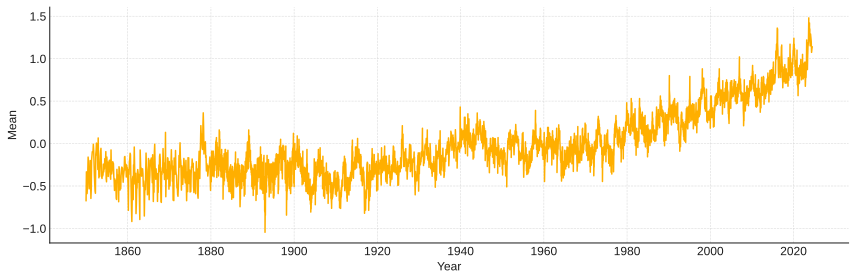

In [14]:
non_stationary.plot_data()

# Stationary Data

In [12]:
stationary = time_series_data()
stationary.data.head()

Month,Sunspots
date,f64
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


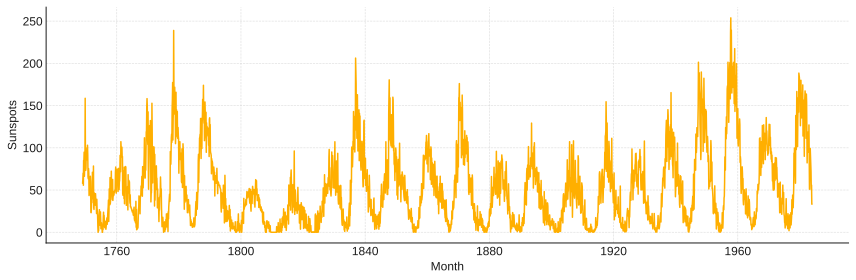

In [15]:
stationary.plot_data()